In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
A=np.load("A_and_W_storage/A.npy")
W=np.load("A_and_W_storage/W.npy")
print(np.shape(A))

Aimag=W[:,:,0,0]


(240, 320, 4, 4)


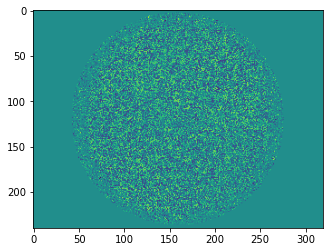

In [95]:
plt.imshow(Aimag)